# E-Waste Image Classification Using EfficientNetV2B0 (Transfer Learning)

![image.png](attachment:image.png)

## Introduction
### Problem Statement and Description
E-waste, or electronic waste, is increasingly emerging as a major global concern, posing significant environmental and health risks. Effective recycling and disposal depend on accurate sorting and classification, but manual methods are often inefficient, error-prone, and time-consuming.

This project focuses on developing an automated e-waste classification system using artificial intelligence and machine learning. By training a deep learning model on images of various e-waste categories, the system can accurately recognize and classify electronic waste components.
### Objective
Use image classification with EfficientNetV2B0 to classify e-waste into 10 distinct categories to support better sorting and recycling automation.

---

### Dataset Overview
### Dataset Name: E-Waste Image Dataset
### Source: https://www.kaggle.com/datasets/akshat103/e-waste-image-dataset
Each directory contains 10 subfolders, each representing one class of e-waste:

- PCB (Printed Circuit Board)
- Player
- Battery
- Microwave
- Mobile
- Mouse
- Printer
- Television
- Washing Machine
- Keyboard

![image.png](attachment:image.png)

# THEORY
### What is Transfer Learning?
Transfer Learning is a machine learning approach where a model trained on one task is repurposed for a different, yet related task. Instead of starting from scratch, it uses the knowledge (features and patterns) learned from a previous large-scale problem to help solve a new one. This method is especially useful when the new task has limited data, as the pre-trained model already contains valuable feature representations that can be fine-tuned.

Transfer learning is widely used in areas like computer vision and natural language processing, where training deep models from scratch can be time-consuming and data-intensive.<br>


### Key Benefits of Transfer Learning
⚡ Faster training — builds on an already trained model, reducing overall training time.

📊 Efficient with limited data — performs well even when the new dataset is small.

🧠 Utilizes pre-learned features — leverages knowledge from large datasets like ImageNet to enhance accuracy and generalization.

---
### How Does It Work?
1. Import a pre-trained model (such as ResNet or EfficientNet) as the foundation.

2. Optionally freeze the existing layers to retain the learned features.

3. Attach custom layers tailored to your specific classification or prediction task.

4. Train the model on your new dataset — you can either fine-tune the entire model or just the new layers.

---
## EfficientNetV2B0: Transfer Learning Backbone
### Overview
EfficientNetV2 is a high-performance model architecture developed by Google, designed to deliver faster training and inference while maintaining strong accuracy.

### Key Highlights:
- Fused MBConv Layers – Enhance GPU efficiency and accelerate training.

- Progressive Learning Strategy – Starts with smaller input sizes and gradually scales them up during training for better convergence.

- Improved Accuracy – Achieves superior results with fewer parameters and lower computational cost (FLOPs).

---
### Why Choose EfficientNetV2B0?
- Compact Design – Optimized for mobile and edge deployment due to its small size.

- High Speed – Offers fast training and inference times.

- Pretrained on ImageNet – Provides a strong foundation for feature extraction.

- Reliable Accuracy – Delivers strong performance, even with limited computational resources.

In [2]:
# Install TensorFlow package
!pip install tensorflow

  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
   ---------------------------------------- 0.0/895.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/895.7 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/895.7 kB ? eta -:--:--
   ----------------------- ---------------- 524.3/895.7 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 895.7/895.7 kB 1.3 MB/s eta 0:00:00
Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 837.5 kB/s eta 0:00:02
   ---------------------------- ----------- 1.0/1.5 MB 1.2 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.5 M

### Core Libraries
- tensorflow: For deep learning model building and training.
- numpy: For numerical operations and array manipulation.
- matplotlib.pyplot: For plotting training curves and results.

In [1]:
import tensorflow as tf  # Core TensorFlow library

from tensorflow.keras import layers, models, optimizers, callbacks  # Layers, model creation, optimizers, and training callbacks

from tensorflow.keras.models import Sequential, load_model  # For sequential model architecture and loading saved models

from tensorflow.keras.applications import EfficientNetV2B0  # Pretrained EfficientNetV2B0 model for transfer learning

from tensorflow.keras.applications.efficientnet import preprocess_input  # Preprocessing function specific to EfficientNet

import numpy as np  # Numerical operations and array handling

import matplotlib.pyplot as plt  # Plotting graphs and images

import seaborn as sns  # Plotting graphs and images

from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for classification models

import gradio as gr  # Web interface library to deploy and test ML models

from PIL import Image  # For image file loading and basic image operations

###  Format: Folder-based image classification dataset  
- `Train/`: Images used for training the model  
- `Test/`: Images used for model evaluation  
- `Validation/`: Images used to fine-tune and validate the model  


In [2]:
testpath=r'C:\Users\tarun\AICTE_E-waste_generation_classification\E-Waste classification dataset\modified-dataset\test'
trainpath=r'C:\Users\tarun\AICTE_E-waste_generation_classification\E-Waste classification dataset\modified-dataset\train'
validpath=r'C:\Users\tarun\AICTE_E-waste_generation_classification\E-Waste classification dataset\modified-dataset\val'

### Core Libraries
- tensorflow: For deep learning model building and training.
- numpy: For numerical operations and array manipulation.
- matplotlib.pyplot: For plotting training curves and results.
## 1.  Explore and Understand the Data
- Load image dataset using tools like `image_dataset_from_directory`.
- Visualize sample images from each class.
- Check the number of images per class to ensure balance.
- Understand image dimensions, color channels, and class labels.


### Load image dataset using tools like `image_dataset_from_directory`.
### Split data into training, validation, and testing sets.

`tf.keras.utils.image_dataset_from_directory(...)`  
Used to load images from a directory where each subfolder represents a class.

---

**path**  
Root directory path containing one subdirectory per class.

**shuffle=True**  
Randomly shuffles the image data. Useful during training to prevent the model from learning the order of the data.

**image_size=(128, 128)**  
Resizes all loaded images to this target size (width, height).  
This must match the input size expected by the model.

**batch_size=32**  
Number of images per batch during training.  
This affects memory usage and the frequency of model updates.

**validation_split=False**  
If set to a float (e.g., `0.2`), splits a portion of the data for validation.  
If `False`, no split is applied.


In [3]:
datatrain= tf.keras.utils.image_dataset_from_directory(trainpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 2400 files belonging to 10 classes.


In [4]:
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [5]:
datavalid = tf.keras.utils.image_dataset_from_directory(validpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [6]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


### Visualize sample images from each class.

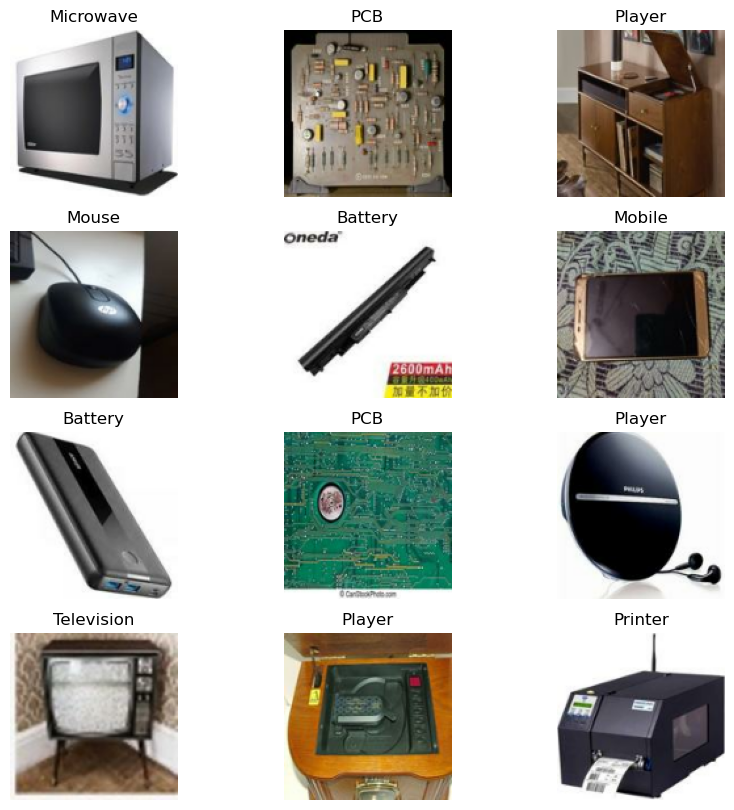

In [7]:

# Set the size of the entire figure (width=10, height=10 inches)
plt.figure(figsize=(10, 10))

# Take one batch from the dataset and iterate over the images and labels
for images, labels in datatrain.take(1):
    # Display the first 12 images from the batch
    for i in range(12):
        # Create a 4x3 grid of subplots and select the (i+1)th position
        ax = plt.subplot(4, 3, i + 1)

        # Display the image; convert the tensor to a NumPy array and ensure correct type
        plt.imshow(images[i].numpy().astype("uint8"))

        # Set the title of the subplot to the class name of the image
        plt.title(class_names[labels[i]])

        # Remove axis ticks and labels for clarity
        plt.axis("off")


In [15]:
def plot_class_distribution(dataset, title="Class Distribution"):
    """
    Plots the number of items per class in a given dataset.

    Args:
        dataset: A tf.data.Dataset object created using image_dataset_from_directory
        title: Title for the plot (e.g., 'Train Data Distribution')
    """

    class_counts = {}  # Dictionary to hold the count of each class

    # Iterate through the batches in the dataset
    for images, labels in dataset:
        # Convert labels tensor to numpy array and loop through each label
        for label in labels.numpy():
            class_name = dataset.class_names[label]  # Get class name using label index
            # Increment the count for this class
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

    # Prepare data for plotting
    class_names = list(class_counts.keys())  # List of class names
    counts = list(class_counts.values())     # Corresponding counts for each class

    # Create the bar plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(class_names, counts, color='skyblue')  # Draw bars with class counts
    plt.xlabel("Class")  # X-axis label
    plt.ylabel("Number of Items")  # Y-axis label
    plt.title(title)  # Plot title
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()  # Display the plot



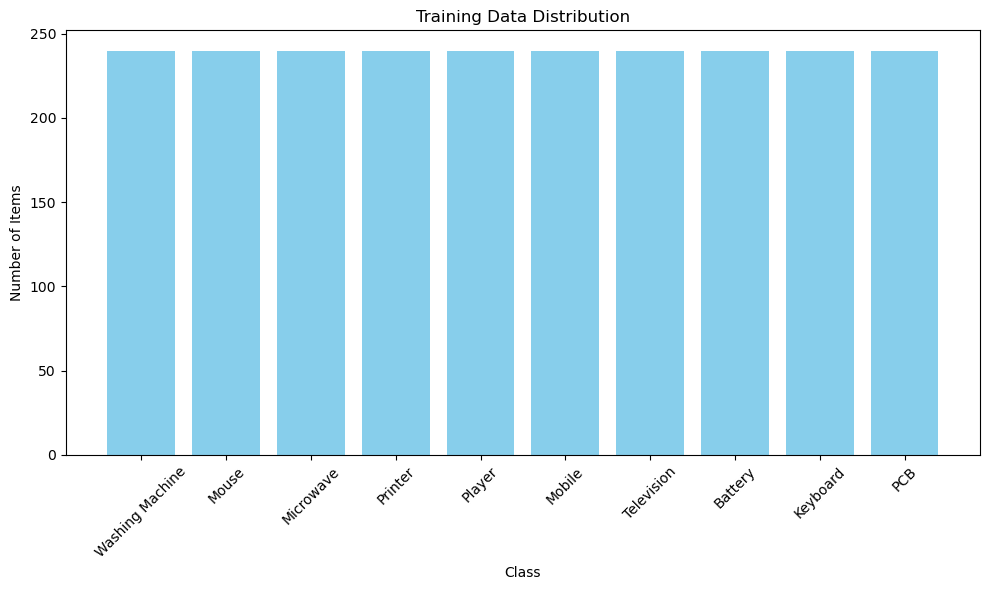

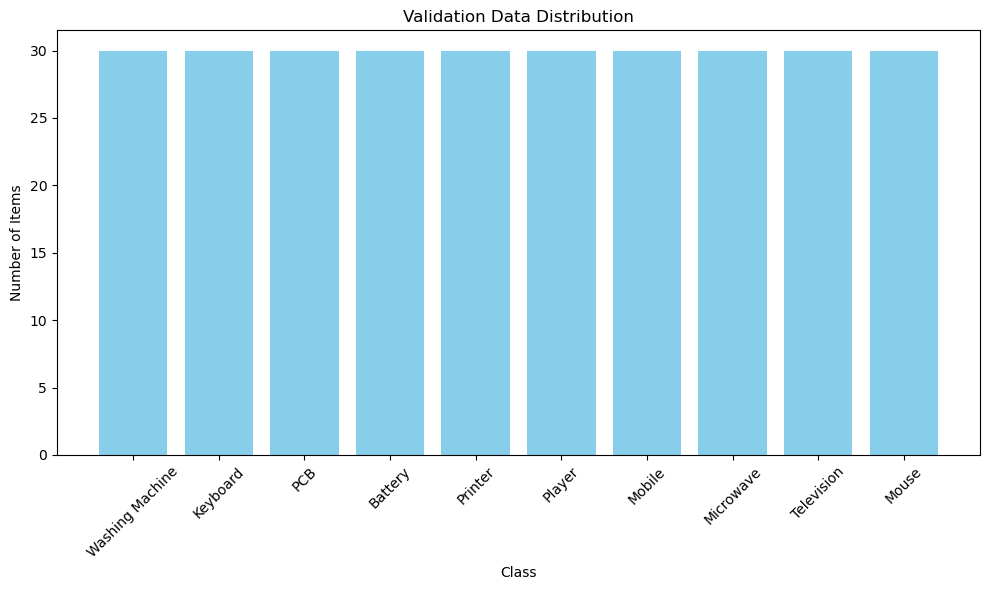

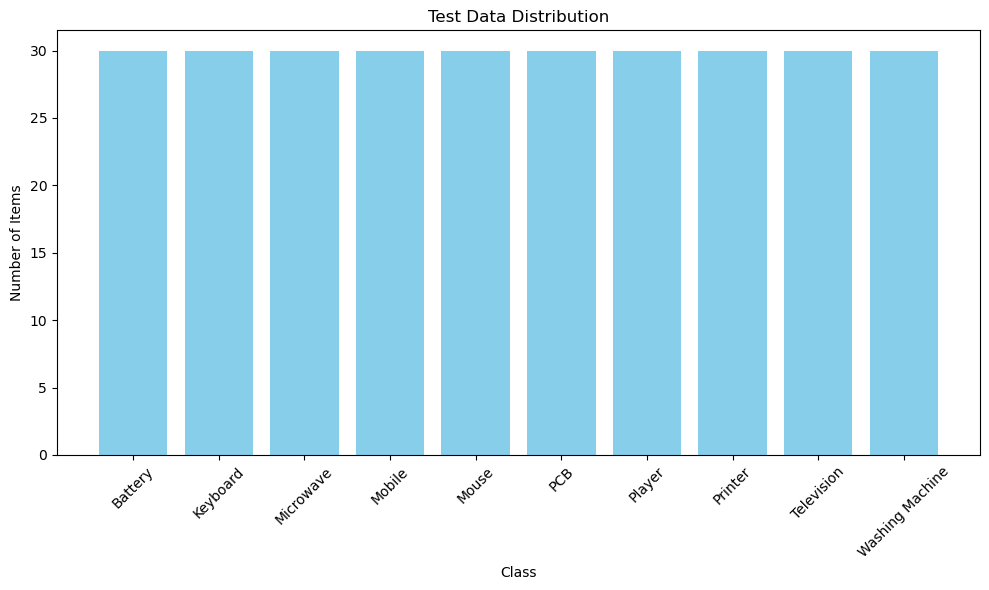

In [16]:
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")